In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("D:/ReClusterData/reclustered5_data.csv")  
required_data = data[['Longitude', 'Latitude', 'Serving RSSI_4G', 'Cluster_Label']]
required_data


,Longitude,Latitude,Serving RSSI_4G,Cluster_Label
0,3.448652,6.425680,-67.00,13
1,3.448772,6.425661,-68.50,3
2,3.448888,6.425641,-67.31,13
3,3.448997,6.425620,-69.00,3
4,3.449104,6.425598,-68.94,3
...,...,...,...,...
316,3.455419,6.429209,-41.63,15
317,3.455424,6.429210,-40.63,15
318,3.455424,6.429210,-39.50,15
319,3.455424,6.429210,-42.38,15


In [3]:
for i in range(20):
    features = data[data['Cluster_Label'] == i]
    print(features)

     Longitude  Latitude  Serving RSSI_4G  cluster  Cluster_Label
14    3.450191  6.425454           -65.00        5              0
15    3.450300  6.425448           -65.25        5              0
16    3.450407  6.425438           -65.38        5              0
19    3.450740  6.425414           -65.19        5              0
24    3.451266  6.425420           -64.38        5              0
25    3.451370  6.425425           -65.19        5              0
99    3.449123  6.427973           -64.50        5              0
122   3.449544  6.428448           -64.38        5              0
137   3.449502  6.429210           -65.50        5              0
141   3.449485  6.429420           -65.25        5              0
143   3.449479  6.429533           -65.19        5              0
145   3.449474  6.429643           -64.44        5              0
153   3.449447  6.429938           -64.38        5              0
160   3.449447  6.430068           -64.88        5              0
162   3.44

In [4]:
summations_per_label = np.zeros(20)
# Initialize a 20x20 matrix to store correlation coefficients
correlation_matrix = np.zeros((20, 20))

# Iterate over each pair of clusters
for i in range(20):
    summation=0
    for j in range(20):
        # Extract 'Serving RSSI_4G' values for clusters i and j
        cluster_i_values = data[data['Cluster_Label'] == i]['Serving RSSI_4G']
        cluster_j_values = data[data['Cluster_Label'] == j]['Serving RSSI_4G']
        
        # Check if both arrays have the same length
        min_len = min(len(cluster_i_values), len(cluster_j_values))
        if min_len > 0:
            # Truncate arrays to the same length
            cluster_i_values = cluster_i_values[:min_len]
            cluster_j_values = cluster_j_values[:min_len]
            
            # Calculate the correlation coefficient between the truncated values of clusters i and j
            correlation_matrix[i, j] = np.corrcoef(cluster_i_values, cluster_j_values)[0, 1]
        else:
            # If one of the arrays is empty, set correlation coefficient to NaN
            correlation_matrix[i, j] = 0

        summation += correlation_matrix[i, j]
    summations_per_label[i] = summation

correlation_matrix = np.nan_to_num(correlation_matrix, nan=0.0)
# Print the correlation matrix
print(correlation_matrix)

[[ 1.         -0.04448627  0.07776031  0.3956739   0.24464965  0.10075668
   0.27273195 -0.66013598  0.29313505 -0.26820791 -0.01486312  0.13361758
   0.67705644 -0.68938587  0.00451273 -0.05150636 -0.44921571 -0.2595893
   0.36241845 -0.3058376 ]
 [-0.04448627  1.          0.60927332 -0.06459599  0.4325688  -0.40917924
   0.03052491  0.17799026 -0.19905214  0.14245012 -0.21693451  0.21786055
   0.39649451 -0.31820209  0.67168836 -0.71782639 -0.04323527  0.10514468
  -0.27594988 -0.07564221]
 [ 0.07776031  0.60927332  1.          0.30767879  0.23244554 -0.47876258
   0.36875097  0.22454021  0.00338187  0.03103775 -0.14269433 -0.25815896
   0.45664032  0.01946484  0.423974   -0.36289636  0.50849624 -0.52311919
  -0.19191948  0.06366183]
 [ 0.3956739  -0.06459599  0.30767879  1.          0.36762966 -0.11554714
   0.43866068 -0.19360657 -0.23424945 -0.38781189 -0.24839962  0.02769145
   0.46059632 -0.16310632  0.01945096  0.31150045  0.20498851 -0.60900906
   0.53984859  0.05072696]
 [ 0.

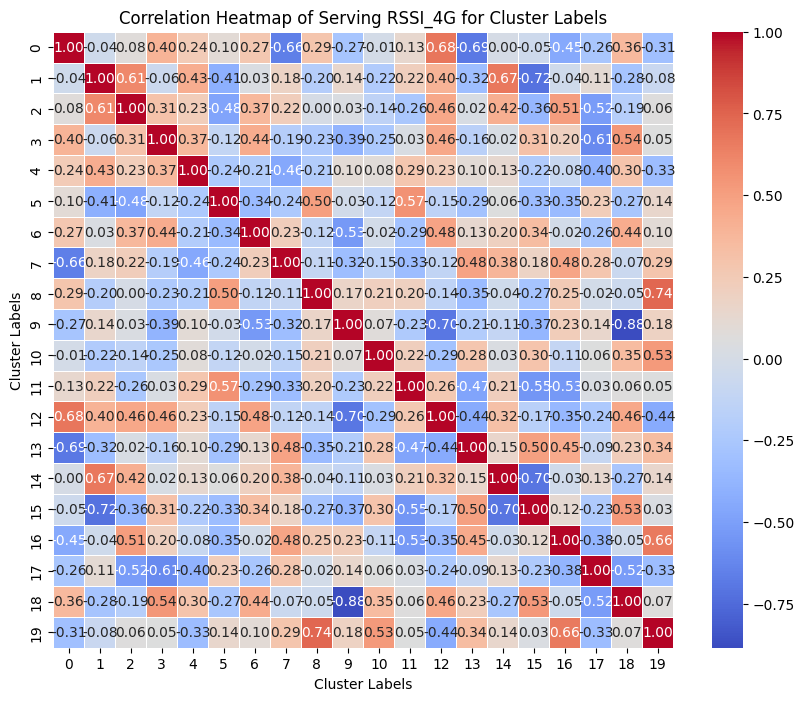

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Serving RSSI_4G for Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Cluster Labels')
plt.show()

Primary Node: 19
Secondary Node: [8, 10, 13, 16]
Primary Node: 12
Secondary Node: [0, 1, 2, 3, 6, 14, 18]
Primary Node: 17
Primary Node: 11
Secondary Node: [5]
Primary Node: 15
Primary Node: 9
Primary Node: 4
Primary Node: 7


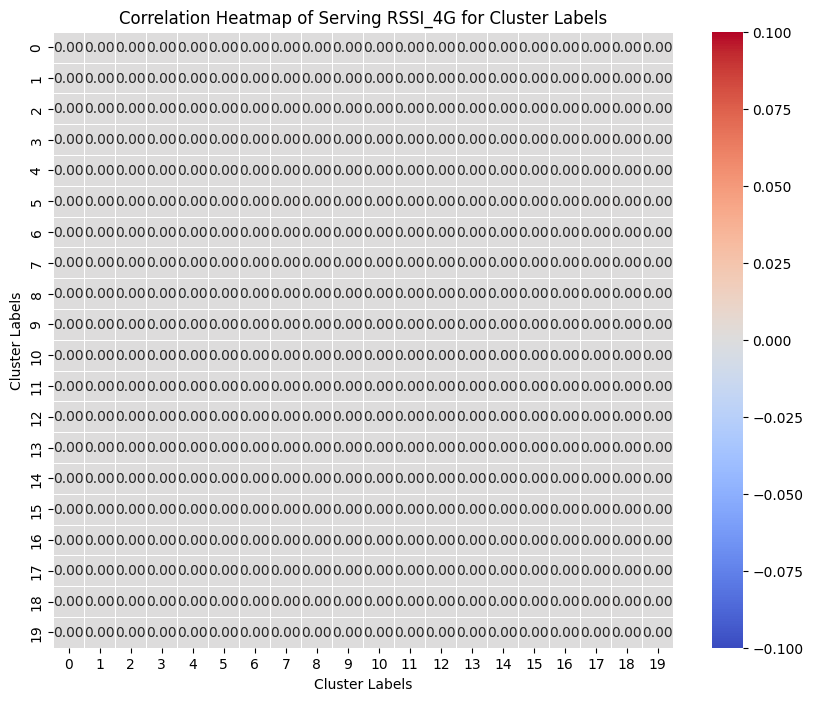

In [6]:
import copy

#method to find the primary and secondary
def find_primary_secondary(co_matrix):
    primary_sum=0
    primary_node=0
    secondary_node=[]
    for i in range(20):
        sum=0

        for j in range(20):
            sum+=co_matrix[i][j]
        
        if(sum>primary_sum):
            primary_sum=sum
            primary_node=i
    
    for i in range(20):
        if(co_matrix[primary_node][i]>=0.3 and primary_node!=i):
            secondary_node.append(i)

    return primary_node,secondary_node

#method to delete the row and column
def delete_secoondary_primary(co_matrix,primary_node,secondary_node):
    n=len(secondary_node)
    for i in range(20):
        co_matrix[primary_node][i]=0
        co_matrix[i][primary_node]=0
        for j in range(n):
            ele=secondary_node[j]
            #print(ele)
            co_matrix[ele][i]=0
            co_matrix[i][ele]=0
    return co_matrix


def main():
    c=0
    co_matrix = copy.deepcopy(correlation_matrix)
    for i in range(20):
        p_node,s_node=find_primary_secondary(co_matrix)
        if any(item == 0 for item in s_node):
            c=c+1
        if p_node==0:
            c=c+1
        if c==2:
            break
        co_matrix=delete_secoondary_primary(co_matrix,p_node,s_node)
        print('Primary Node:',p_node)
        if s_node:
            print('Secondary Node:',s_node)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(co_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap of Serving RSSI_4G for Cluster Labels')
    plt.xlabel('Cluster Labels')
    plt.ylabel('Cluster Labels')
    plt.show()
if __name__=='__main__':
    main()
  